In [54]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
 
# Database connection configuration
# Replace with your actual credentials
server = 'upgrade-abnb-server.database.windows.net'
database = 'Upgrade_Abnb'
username = 'vmabnbserver'
password = 'JWkWW8Bg%>jy,Xj!'
 
# Function to test ODBC drivers and create connection
def create_db_connection():
    """Create database connection with fallback driver options"""
    drivers = [
        'ODBC Driver 18 for SQL Server',
        'ODBC Driver 17 for SQL Server',
        'ODBC Driver 13 for SQL Server',
        'SQL Server Native Client 11.0',
        'SQL Server'
    ]
    # Test available drivers
    available_drivers = [driver for driver in pyodbc.drivers() if any(d in driver for d in ['SQL Server', 'ODBC'])]
    print(f"Available ODBC drivers: {available_drivers}")
    for driver in drivers:
        if driver in available_drivers:
            try:
                connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}&TrustServerCertificate=yes&Encrypt=yes'
                engine = create_engine(connection_string)
                # Test connection
                with engine.connect() as conn:
                    conn.execute(sqlalchemy.text("SELECT 1"))
                print(f"Successfully connected using driver: {driver}")
                return engine, connection_string
            except Exception as e:
                print(f"Failed with driver {driver}: {str(e)}")
                continue
    # If all drivers fail, try without encryption
    for driver in drivers:
        if driver in available_drivers:
            try:
                connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}&TrustServerCertificate=yes'
                engine = create_engine(connection_string)
                # Test connection
                with engine.connect() as conn:
                    conn.execute(sqlalchemy.text("SELECT 1"))
                print(f"Successfully connected using driver (no encryption): {driver}")
                return engine, connection_string
            except Exception as e:
                print(f"Failed with driver {driver} (no encryption): {str(e)}")
                continue
    raise Exception("Could not establish database connection with any available driver")
 
# Create connection engine
engine, connection_string = create_db_connection()
 


Available ODBC drivers: ['SQL Server', 'ODBC Driver 18 for SQL Server', 'ODBC Driver 17 for SQL Server']
Successfully connected using driver: ODBC Driver 18 for SQL Server


In [9]:
# Function to execute queries and return DataFrames
def query_to_df_completo(query_completo, engine=engine):
    """Execute SQL query and return DataFrame"""
    return pd.read_sql(query_completo, engine)
 
# Load main dataset
query_completo = "SELECT * FROM [dbo].[listings_completo]"
df_listings = query_to_df_completo(query_completo)
 
# Configure matplotlib and seaborn for better visualizations
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
 
# Display basic information
print("=== DATABASE CONNECTION ESTABLISHED ===")
print(f"Connected to: {database}")
print(f"DataFrame shape: {df_listings.shape}")
print(f"Columns: {list(df_listings.columns)}")
print("\n=== FIRST 5 ROWS ===")
print(df_listings.head())
print("\n=== DATA TYPES ===")
print(df_listings.dtypes)
print("\n=== MISSING VALUES ===")
print(df_listings.isnull().sum())


=== DATABASE CONNECTION ESTABLISHED ===
Connected to: Upgrade_Abnb
DataFrame shape: (1630091, 63)
Columns: ['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name', 'id_y', 'name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 're

In [10]:
# Function to execute queries and return DataFrames
def query_to_df_resumen(query_resumen, engine=engine):
    """Execute SQL query and return DataFrame"""
    return pd.read_sql(query_resumen, engine)

query_resumen = "SELECT * FROM [dbo].[listings_summary]"
df_resumen = query_to_df_resumen(query_resumen)

# Display basic information
print("=== DATABASE CONNECTION ESTABLISHED ===")
print(f"Connected to: {database}")
print(f"DataFrame shape: {df_resumen.shape}")
print(f"Columns: {list(df_resumen.columns)}")
print("\n=== FIRST 5 ROWS ===")
print(df_resumen.head())
print("\n=== DATA TYPES ===")
print(df_resumen.dtypes)
print("\n=== MISSING VALUES ===")
print(df_resumen.isnull().sum())

=== DATABASE CONNECTION ESTABLISHED ===
Connected to: Upgrade_Abnb
DataFrame shape: (31890, 19)
Columns: ['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'orignen', 'neighbourhood_origen']

=== FIRST 5 ROWS ===
       id  host_id host_name neighbourhood_group neighbourhood   latitude  \
0   96033   510467    Rafael           Sin_grupo          Este  36.720310   
1  166473   793360      Fred           Sin_grupo          Este  36.720310   
2  330760  1687526     Mayte           Sin_grupo        Centro  36.729786   
3  340024  1725690    Carlos           Sin_grupo        Centro  36.728130   
4  358541  1526932  Cristina           Sin_grupo        Centro  36.723740   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -4.356270  Ent

In [11]:
# Select listings where 'id_y' is not null (i.e., available)
alojamientos_disponibles = df_listings['id_y'].nunique()
print(f"Cantidad de valores únicos en 'id_y': {alojamientos_disponibles}")

Cantidad de valores únicos en 'id_y': 25180


In [12]:
alojamientos_disponibles_resumen = df_resumen['id'].nunique()
print(f"Cantidad de valores únicos en 'id_y': {alojamientos_disponibles_resumen}")

Cantidad de valores únicos en 'id_y': 31890


In [13]:
disponibilidad = df_listings['has_availability'].value_counts()
print("Cantidad de valores en 'has_availability':")
print(disponibilidad)

# Alternative: more explicit output
print("\nDesglose detallado:")
count_t = (df_listings['has_availability'] == 't').sum()
count_f = (df_listings['has_availability'] == 'f').sum()
total = len(df_listings['has_availability'])

print(f"Valores 't' (disponible): {count_t}")
print(f"Valores 'f' (no disponible): {count_f}")
print(f"Total de registros: {total}")
print(f"Porcentaje 't': {(count_t/total)*100:.2f}%")
print(f"Porcentaje 'f': {(count_f/total)*100:.2f}%")

Cantidad de valores en 'has_availability':
has_availability
t              1629758
Not_defined        326
f                    7
Name: count, dtype: int64

Desglose detallado:
Valores 't' (disponible): 1629758
Valores 'f' (no disponible): 7
Total de registros: 1630091
Porcentaje 't': 99.98%
Porcentaje 'f': 0.00%


In [14]:
# Transform 'has_availability' column: 't' -> 1, 'f' -> 0
df_listings['has_availability_numeric'] = (df_listings['has_availability'] == 't').astype(int)

# Calculate mean of has_availability for available accommodations (where id_y is not null)
# alojamientos_disponibles_mask = df_listings['id_y'].notna()
media_disponibilidad = df_listings.loc[alojamientos_disponibles, 'has_availability_numeric'].mean()

print(f"Cantidad de alojamientos disponibles: {alojamientos_disponibles}")
print(f"Media de 'has_availability' en alojamientos disponibles: {media_disponibilidad:.4f}")
print(f"Porcentaje de alojamientos con disponibilidad: {media_disponibilidad * 100:.2f}%")

Cantidad de alojamientos disponibles: 25180
Media de 'has_availability' en alojamientos disponibles: 1.0000
Porcentaje de alojamientos con disponibilidad: 100.00%


## Tasa de ocupación

Preparación de datos

In [23]:
df_listings['date'] = pd.to_datetime(df_listings['date'])
df_listings['year'] = df_listings['date'].dt.year



In [25]:
# Filtrar un único registro por alojamiento y año (el último de ese año)
df_ult_por_listado = (
    df_listings.sort_values('date')  # Asegura orden por fecha
    .drop_duplicates(subset=['listing_id', 'year'], keep='last')
  )  # último del año

Tasa de ocupación por año

In [26]:
# Añadir columna de noches ocupadas
df_ult_por_listado['noches_ocupadas'] = 365 - df_ult_por_listado['availability_365']

# Si hay años bisiestos:
df_ult_por_listado['dias_del_año'] = df_ult_por_listado['year'].apply(lambda y: 366 if y % 4 == 0 else 365)

ocupacion_anual = df_ult_por_listado.groupby('year').agg(
    noches_ocupadas=('noches_ocupadas', 'sum'),
    capacidad_total=('dias_del_año', 'sum')
)

ocupacion_anual['tasa_ocupacion_%'] = (
    ocupacion_anual['noches_ocupadas'] / ocupacion_anual['capacidad_total'] * 100
)

print(ocupacion_anual.round(2))

      noches_ocupadas  capacidad_total  tasa_ocupacion_%
year                                                    
2010              188              365             51.51
2011             1754             3650             48.05
2012            14776            24888             59.37
2013            53538            93440             57.30
2014           113180           201115             56.28
2015           227090           398945             56.92
2016           425620           735294             57.88
2017           688251          1184060             58.13
2018          1007646          1697980             59.34
2019          1359205          2302785             59.02
2020          1229631          2085468             58.96
2021          1880666          3301060             56.97
2022          2540767          4573815             55.55
2023          3260485          5905700             55.21
2024          4217939          7812270             53.99
2025          2095935          

Tasa de ocupación por origen

In [27]:
ocupacion_origen = df_ult_por_listado.groupby('origen').agg(
    noches_ocupadas=('noches_ocupadas', 'sum'),
    capacidad_total=('dias_del_año', 'sum')
)

ocupacion_origen['tasa_ocupacion_%'] = (
    ocupacion_origen['noches_ocupadas'] / ocupacion_origen['capacidad_total'] * 100
)

print(ocupacion_origen.round(2))

          noches_ocupadas  capacidad_total  tasa_ocupacion_%
origen                                                      
Mallorca          8478516         15140515             56.00
Málaga            5968950         10531760             56.68
Valencia          4669205          8598955             54.30


Tasa de ocupación por origen y año

In [33]:
ocupacion_origen_anio = df_ult_por_listado.groupby(['origen', 'year']).agg(
    noches_ocupadas=('noches_ocupadas', 'sum'),
    capacidad_total=('dias_del_año', 'sum')
)

ocupacion_origen_anio['tasa_ocupacion_%'] = (
    ocupacion_origen_anio['noches_ocupadas'] / ocupacion_origen_anio['capacidad_total'] * 100
)

ocupacion_origen_anio = ocupacion_origen_anio.reset_index()

print(ocupacion_origen_anio.round(2))

      origen  year  noches_ocupadas  capacidad_total  tasa_ocupacion_%
0   Mallorca  2011              689             1460             47.19
1   Mallorca  2012             8732            14640             59.64
2   Mallorca  2013            29108            51100             56.96
3   Mallorca  2014            65275           117895             55.37
4   Mallorca  2015           126117           222650             56.64
5   Mallorca  2016           225330           391986             57.48
6   Mallorca  2017           357361           619405             57.69
7   Mallorca  2018           487624           832200             58.59
8   Mallorca  2019           680376          1168000             58.25
9   Mallorca  2020           552097           956358             57.73
10  Mallorca  2021           995415          1758935             56.59
11  Mallorca  2022          1287308          2300230             55.96
12  Mallorca  2023          1497371          2691145             55.64
13  Ma

In [32]:

# Gráfico 1: Barras por año
fig1 = px.bar(
    ocupacion_anual.reset_index(), 
    x='year', y='tasa_ocupacion_%',
    title='Tasa de Ocupación por Año (%)',
    labels={'tasa_ocupacion_%': 'Ocupación (%)'},
    color_discrete_sequence=['steelblue']
)
fig1.show()

# Gráfico 2: Circular por origen
fig2 = px.pie(
    ocupacion_origen.reset_index(), 
    names='origen', values='tasa_ocupacion_%',
    title='Distribución de la Tasa de Ocupación por Origen (%)'
)
fig2.show()

# Gráfico 3: Línea por origen y año
fig3 = px.line(
    ocupacion_origen_anio.reset_index(), 
    x='year', y='tasa_ocupacion_%', 
    color='origen',
    title='Tasa de Ocupación por Origen y Año (%)',
    markers=True,
    labels={'tasa_ocupacion_%': 'Ocupación (%)'}
)
fig3.show()

# RevPAR

##### 📌 Recordatorio de fórmulas:
##### 🔹 Opción 1:
##### RevPAR = ingresos totales por habitaciones / número de habitaciones disponibles

##### 🔹 Opción 2:
##### RevPAR = ADR × tasa de ocupación

In [41]:
# Usamos último registro por año para conocer disponibilidad
df_ult = df_ult_por_listado.sort_values('date').drop_duplicates(subset=['listing_id', 'year'], keep='last')
df_ult['dias_del_año'] = df_ult['year'].apply(lambda y: 366 if y % 4 == 0 else 365)

1. RevPAR por año — con fórmula directa (ingresos / disponibilidad)

In [ ]:
# Ingresos totales por año (sumando precios de noches efectivamente ocupadas)
ingresos_por_año = df_ult_por_listado.groupby('year')['price'].sum()

# Habitaciones disponibles por año (sumando noches ocupadas)
habitaciones_disponibles_por_año = df_ult.groupby('year')['noches_ocupadas'].sum()

# RevPAR = ingresos totales / habitaciones disponibles
revpar_directo = (ingresos_por_año / habitaciones_disponibles_por_año).to_frame(name='RevPAR')

print(revpar_directo.round(2))

      RevPAR
year        
2010    0.82
2011    0.74
2012    0.66
2013    0.73
2014    0.78
2015    0.82
2016    0.85
2017    0.87
2018    1.31
2019    1.53
2020    1.32
2021    2.37
2022    2.46
2023    2.45
2024    2.48
2025    1.16


2. RevPAR por año — con fórmula ADR × ocupación

In [44]:
# ADR = ingreso promedio por reserva (por noche)
adr = df_ult_por_listado.groupby('year')['price'].mean()

# Tasa de ocupación = noches ocupadas / capacidad total
# Calculamos noches ocupadas por año correctamente:
noches_ocupadas = (df_ult['dias_del_año'] - df_ult['noches_ocupadas']).groupby(df_ult['year']).sum()
capacidad_total = df_ult.groupby('year')['dias_del_año'].sum()
tasa_ocupacion = (noches_ocupadas / capacidad_total)

# RevPAR = ADR × tasa ocupación
revpar_por_tasa = ((adr * tasa_ocupacion) / 100).to_frame(name='RevPAR')

print(revpar_por_tasa.round(2))

      RevPAR
year        
2010    0.75
2011    0.67
2012    0.59
2013    0.65
2014    0.70
2015    0.73
2016    0.76
2017    0.78
2018    1.15
2019    1.35
2020    1.17
2021    2.12
2022    2.22
2023    2.21
2024    2.26
2025    1.05


In [45]:
revpar_comparado = revpar_directo.join(revpar_por_tasa, lsuffix='_directo', rsuffix='_ADR_tasa')
print(revpar_comparado.round(2))

      RevPAR_directo  RevPAR_ADR_tasa
year                                 
2010            0.82             0.75
2011            0.74             0.67
2012            0.66             0.59
2013            0.73             0.65
2014            0.78             0.70
2015            0.82             0.73
2016            0.85             0.76
2017            0.87             0.78
2018            1.31             1.15
2019            1.53             1.35
2020            1.32             1.17
2021            2.37             2.12
2022            2.46             2.22
2023            2.45             2.21
2024            2.48             2.26
2025            1.16             1.05


In [46]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=revpar_comparado.index.astype(str),
    y=revpar_comparado['RevPAR_directo'],
    name='RevPAR (directo)',
    marker_color='steelblue'
))
fig.add_trace(go.Bar(
    x=revpar_comparado.index.astype(str),
    y=revpar_comparado['RevPAR_ADR_tasa'],
    name='RevPAR (ADR × Ocupación)',
    marker_color='indianred'
))
fig.update_layout(
    title='Comparación de RevPAR por Año',
    xaxis_title='Año',
    yaxis_title='RevPAR (€)',
    barmode='group'
)
fig.show()

In [52]:
# Asegurar que 'date' es datetime y crear columna 'year'
df_ult_por_listado['date'] = pd.to_datetime(df_ult_por_listado['date'])
df_ult_por_listado['year'] = df_ult_por_listado['date'].dt.year

# Último registro por alojamiento y año para calcular disponibilidad
df_ult = df_ult_por_listado.sort_values('date').drop_duplicates(subset=['listing_id', 'year'], keep='last')
df_ult['dias_del_año'] = df_ult['year'].apply(lambda y: 366 if y % 4 == 0 else 365)

# Ingresos totales por origen y año (sumando precios por noche)
ingresos_por_origen_anio = df_ult_por_listado.groupby(['origen', 'year'])['price'].sum()

# Noches disponibles por origen y año
disponibles_por_origen_anio = df_ult.groupby(['origen', 'year'])['noches_ocupadas'].sum()

# RevPAR directo = ingresos / disponibilidad
revpar_directo = (ingresos_por_origen_anio / disponibles_por_origen_anio).to_frame(name='RevPAR_directo').reset_index()

# ADR (Average Daily Rate) por origen y año
adr_origen_anio = df_ult_por_listado.groupby(['origen', 'year'])['price'].mean()

# Tasa de ocupación: (365 - noches_ocupadas) / 365
noches_ocupadas = df_ult.groupby(['origen', 'year'])['noches_ocupadas'].apply(lambda x: (365 - x).sum())
capacidad_total = df_ult.groupby(['origen', 'year'])['dias_del_año'].sum()
tasa_ocupacion = (noches_ocupadas / capacidad_total)

# RevPAR = ADR × tasa ocupación
revpar_adr = ((adr_origen_anio * tasa_ocupacion) / 100).to_frame(name='RevPAR_ADR_tasa').reset_index()

# Combinar ambas métricas
revpar_comparado = pd.merge(revpar_directo, revpar_adr, on=['origen', 'year'])

print(revpar_comparado.round(2))

      origen  year  RevPAR_directo  RevPAR_ADR_tasa
0   Mallorca  2011            0.67             0.61
1   Mallorca  2012            0.65             0.57
2   Mallorca  2013            0.85             0.76
3   Mallorca  2014            0.93             0.84
4   Mallorca  2015            1.01             0.91
5   Mallorca  2016            1.07             0.95
6   Mallorca  2017            1.11             0.99
7   Mallorca  2018            1.99             1.76
8   Mallorca  2019            2.35             2.09
9   Mallorca  2020            2.06             1.83
10  Mallorca  2021            3.82             3.42
11  Mallorca  2022            4.09             3.68
12  Mallorca  2023            4.35             3.92
13  Mallorca  2024            4.65             4.19
14  Mallorca  2025            3.00             2.74
15    Málaga  2011            0.34             0.18
16    Málaga  2012            0.23             0.17
17    Málaga  2013            0.39             0.35
18    Málaga

In [53]:
# Visualización
fig = px.bar(
    revpar_comparado.melt(id_vars=['origen', 'year'], 
                          value_vars=['RevPAR_directo', 'RevPAR_ADR_tasa'], 
                          var_name='Método', value_name='RevPAR (€)'),
    x='year', y='RevPAR (€)', color='Método', barmode='group',
    facet_col='origen', facet_col_wrap=3,
    title='Comparación de RevPAR por Año y Origen (Directo vs ADR × Ocupación)'
)
fig.update_layout(height=800, showlegend=True)
fig.show()

# calificaciones promedio

In [55]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def analizar_calificaciones_alojamientos(df_ult_por_listado):
    """
    Analiza las calificaciones promedio de los alojamientos de manera eficiente
    """
    
    # Crear una copia para trabajar sin modificar el original
    df = df_ult_por_listado.copy()
    
    # Columnas de calificaciones
    columnas_calificaciones = [
        'review_scores_rating',
        'review_scores_accuracy', 
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value'
    ]
    
    # Verificar qué columnas existen realmente
    columnas_existentes = [col for col in columnas_calificaciones if col in df.columns]
    
    if not columnas_existentes:
        print("⚠️ No se encontraron columnas de calificaciones")
        return None, None
    
    # Filtrar solo alojamientos con calificaciones
    df_con_calificaciones = df[df[columnas_existentes].notna().any(axis=1)].copy()
    
    print(f"📊 Analizando {len(df_con_calificaciones)} alojamientos con calificaciones")
    print(f"📋 Columnas de calificación encontradas: {len(columnas_existentes)}")
    
    # Calcular estadísticas por alojamiento
    resultados = []
    
    for idx, row in df_con_calificaciones.iterrows():
        # Calificaciones del alojamiento actual
        calificaciones = row[columnas_existentes].dropna()
        
        if len(calificaciones) > 0:
            resultado = {
                'listing_id': row.get('listing_id', idx),
                'name': row.get('name', f'Alojamiento {idx}'),
                'property_type': row.get('property_type', 'No especificado'),
                'neighbourhood': row.get('neighbourhood', 'No especificado'),
                'number_of_reviews': row.get('number_of_reviews', 0),
                'calificacion_promedio': calificaciones.mean(),
                'calificacion_general': row.get('review_scores_rating', np.nan),
                'num_categorias_calificadas': len(calificaciones),
                'calificacion_minima': calificaciones.min(),
                'calificacion_maxima': calificaciones.max(),
                'desviacion_std': calificaciones.std() if len(calificaciones) > 1 else 0,
            }
            
            # Agregar columna de noches ocupadas si existe
            if 'noches_ocupadas' in df.columns:
                resultado['noches_ocupadas'] = row.get('noches_ocupadas', 0)
            elif 'availability_365' in df.columns:
                resultado['noches_ocupadas'] = 365 - row.get('availability_365', 365)
            else:
                resultado['noches_ocupadas'] = 0
                
            # Calcular categoría de calificación
            if resultado['calificacion_promedio'] >= 4.8:
                resultado['categoria'] = 'Excelente'
            elif resultado['calificacion_promedio'] >= 4.5:
                resultado['categoria'] = 'Muy Bueno'
            elif resultado['calificacion_promedio'] >= 4.0:
                resultado['categoria'] = 'Bueno'
            elif resultado['calificacion_promedio'] >= 3.5:
                resultado['categoria'] = 'Regular'
            else:
                resultado['categoria'] = 'Necesita Mejoras'
            
            resultados.append(resultado)
    
    # Crear DataFrame con resultados
    df_resultados = pd.DataFrame(resultados)
    
    if df_resultados.empty:
        print("⚠️ No se pudieron calcular calificaciones")
        return None, None
    
    # Ordenar por calificación promedio
    df_resultados = df_resultados.sort_values('calificacion_promedio', ascending=False)
    
    # Estadísticas generales
    stats_generales = {
        'total_alojamientos': len(df_resultados),
        'calificacion_promedio_general': df_resultados['calificacion_promedio'].mean(),
        'mediana_calificaciones': df_resultados['calificacion_promedio'].median(),
        'desviacion_std_general': df_resultados['calificacion_promedio'].std(),
        'mejor_calificacion': df_resultados['calificacion_promedio'].max(),
        'peor_calificacion': df_resultados['calificacion_promedio'].min(),
    }
    
    return df_resultados, stats_generales

def mostrar_tabla_resultados(df_resultados, stats_generales, top_n=20):
    """
    Muestra tabla con los resultados de manera elegante
    """
    if df_resultados is None:
        return
    
    print("\n" + "="*80)
    print("🏆 ANÁLISIS DE CALIFICACIONES DE ALOJAMIENTOS")
    print("="*80)
    
    # Estadísticas generales
    print(f"\n📈 ESTADÍSTICAS GENERALES:")
    print(f"   • Total de alojamientos analizados: {stats_generales['total_alojamientos']:,}")
    print(f"   • Calificación promedio general: {stats_generales['calificacion_promedio_general']:.2f}")
    print(f"   • Mediana de calificaciones: {stats_generales['mediana_calificaciones']:.2f}")
    print(f"   • Desviación estándar: {stats_generales['desviacion_std_general']:.2f}")
    print(f"   • Mejor calificación: {stats_generales['mejor_calificacion']:.2f}")
    print(f"   • Peor calificación: {stats_generales['peor_calificacion']:.2f}")
    
    # Distribución por categorías
    print(f"\n🎯 DISTRIBUCIÓN POR CATEGORÍAS:")
    distribucion = df_resultados['categoria'].value_counts()
    for categoria, cantidad in distribucion.items():
        porcentaje = (cantidad / len(df_resultados)) * 100
        print(f"   • {categoria}: {cantidad} ({porcentaje:.1f}%)")
    
    # Top alojamientos
    print(f"\n🥇 TOP {top_n} ALOJAMIENTOS MEJOR CALIFICADOS:")
    print("-" * 80)
    
    # Crear tabla formateada
    tabla_top = df_resultados.head(top_n)[['name', 'property_type', 'neighbourhood', 
                                          'calificacion_promedio', 'number_of_reviews', 
                                          'noches_ocupadas', 'categoria']].copy()
    
    # Truncar nombres largos
    tabla_top['name'] = tabla_top['name'].apply(lambda x: x[:30] + '...' if len(str(x)) > 30 else x)
    tabla_top['neighbourhood'] = tabla_top['neighbourhood'].apply(lambda x: x[:15] + '...' if len(str(x)) > 15 else x)
    
    # Renombrar columnas para mostrar
    tabla_top.columns = ['Nombre', 'Tipo', 'Barrio', 'Calif. Prom.', 'Reseñas', 'Noches Ocup.', 'Categoría']
    
    print(tabla_top.to_string(index=False, float_format='%.2f'))
    
    return tabla_top

def crear_visualizaciones(df_resultados, stats_generales):
    """
    Crea visualizaciones creativas y originales
    """
    if df_resultados is None:
        return
    
    # Configurar el estilo y tamaño
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)
    
    # Paleta de colores personalizada
    colores_categoria = {
        'Excelente': '#2E8B57',      # Verde oscuro
        'Muy Bueno': '#32CD32',      # Verde lima
        'Bueno': '#FFD700',          # Dorado
        'Regular': '#FF8C00',        # Naranja oscuro
        'Necesita Mejoras': '#DC143C' # Rojo carmesí
    }
    
    # 1. Distribución de calificaciones (Histograma con curva de densidad)
    ax1 = fig.add_subplot(gs[0, :2])
    
    # Histograma
    n, bins, patches = ax1.hist(df_resultados['calificacion_promedio'], bins=30, 
                               alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5)
    
    # Colorear barras según valor
    for i, p in enumerate(patches):
        valor = (bins[i] + bins[i+1]) / 2
        if valor >= 4.8:
            p.set_facecolor('#2E8B57')
        elif valor >= 4.5:
            p.set_facecolor('#32CD32')
        elif valor >= 4.0:
            p.set_facecolor('#FFD700')
        elif valor >= 3.5:
            p.set_facecolor('#FF8C00')
        else:
            p.set_facecolor('#DC143C')
    
    # Línea de promedio
    ax1.axvline(stats_generales['calificacion_promedio_general'], color='red', 
                linestyle='--', linewidth=2, label=f'Promedio: {stats_generales["calificacion_promedio_general"]:.2f}')
    
    ax1.set_title('📊 Distribución de Calificaciones Promedio', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Calificación Promedio')
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Pie chart de categorías
    ax2 = fig.add_subplot(gs[0, 2])
    distribucion = df_resultados['categoria'].value_counts()
    
    colors = [colores_categoria[cat] for cat in distribucion.index]
    wedges, texts, autotexts = ax2.pie(distribucion.values, labels=distribucion.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90,
                                      textprops={'fontsize': 9})
    
    ax2.set_title('🎯 Distribución por Categorías', fontsize=14, fontweight='bold')
    
    # 3. Scatter plot: Calificación vs Número de reseñas
    ax3 = fig.add_subplot(gs[1, :2])
    
    scatter = ax3.scatter(df_resultados['number_of_reviews'], 
                         df_resultados['calificacion_promedio'],
                         c=df_resultados['noches_ocupadas'], 
                         cmap='viridis', alpha=0.6, s=50)
    
    # Añadir línea de tendencia
    z = np.polyfit(df_resultados['number_of_reviews'], df_resultados['calificacion_promedio'], 1)
    p = np.poly1d(z)
    ax3.plot(df_resultados['number_of_reviews'], p(df_resultados['number_of_reviews']), 
             "r--", alpha=0.8, linewidth=2)
    
    ax3.set_xlabel('Número de Reseñas')
    ax3.set_ylabel('Calificación Promedio')
    ax3.set_title('🔍 Relación: Calificaciones vs Reseñas\n(Color = Noches Ocupadas)', 
                  fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax3, shrink=0.8)
    cbar.set_label('Noches Ocupadas', rotation=270, labelpad=15)
    
    # 4. Box plot por tipo de propiedad
    ax4 = fig.add_subplot(gs[1, 2])
    
    # Obtener los tipos más comunes
    tipos_comunes = df_resultados['property_type'].value_counts().head(5).index
    df_tipos = df_resultados[df_resultados['property_type'].isin(tipos_comunes)]
    
    if not df_tipos.empty:
        box_plot = ax4.boxplot([df_tipos[df_tipos['property_type'] == tipo]['calificacion_promedio'].values 
                               for tipo in tipos_comunes], 
                              labels=[tipo[:10] + '...' if len(tipo) > 10 else tipo for tipo in tipos_comunes],
                              patch_artist=True)
        
        # Colorear cajas
        colors = plt.cm.Set3(np.linspace(0, 1, len(box_plot['boxes'])))
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
        
        ax4.set_title('📦 Calificaciones por Tipo de Propiedad', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Calificación Promedio')
        ax4.tick_params(axis='x', rotation=45)
    
    # 5. Heatmap de correlaciones
    ax5 = fig.add_subplot(gs[2, :])
    
    # Seleccionar columnas numéricas para correlación
    cols_numericas = ['calificacion_promedio', 'number_of_reviews', 'noches_ocupadas', 
                     'num_categorias_calificadas', 'desviacion_std']
    
    matriz_corr = df_resultados[cols_numericas].corr()
    
    # Crear heatmap personalizado
    im = ax5.imshow(matriz_corr, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
    
    # Añadir etiquetas
    ax5.set_xticks(range(len(cols_numericas)))
    ax5.set_yticks(range(len(cols_numericas)))
    ax5.set_xticklabels([col.replace('_', ' ').title() for col in cols_numericas], rotation=45)
    ax5.set_yticklabels([col.replace('_', ' ').title() for col in cols_numericas])
    
    # Añadir valores en las celdas
    for i in range(len(cols_numericas)):
        for j in range(len(cols_numericas)):
            text = ax5.text(j, i, f'{matriz_corr.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    ax5.set_title('🔥 Matriz de Correlaciones', fontsize=14, fontweight='bold')
    
    # Colorbar para heatmap
    cbar2 = plt.colorbar(im, ax=ax5, shrink=0.8)
    cbar2.set_label('Correlación', rotation=270, labelpad=15)
    
    # 6. Top 10 alojamientos (Barras horizontales)
    ax6 = fig.add_subplot(gs[3, :])
    
    top_10 = df_resultados.head(10)
    nombres_cortos = [nombre[:25] + '...' if len(nombre) > 25 else nombre 
                     for nombre in top_10['name']]
    
    # Crear barras con gradiente de colores
    bars = ax6.barh(range(len(top_10)), top_10['calificacion_promedio'], 
                    color=[colores_categoria[cat] for cat in top_10['categoria']])
    
    # Añadir valores en las barras
    for i, (bar, valor) in enumerate(zip(bars, top_10['calificacion_promedio'])):
        ax6.text(valor + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{valor:.2f}', va='center', fontweight='bold')
    
    ax6.set_yticks(range(len(top_10)))
    ax6.set_yticklabels(nombres_cortos)
    ax6.set_xlabel('Calificación Promedio')
    ax6.set_title('🏆 Top 10 Alojamientos Mejor Calificados', fontsize=14, fontweight='bold')
    ax6.grid(True, axis='x', alpha=0.3)
    
    # Invertir orden para que el mejor esté arriba
    ax6.invert_yaxis()
    
    # Título general
    fig.suptitle('🏠 ANÁLISIS COMPLETO DE CALIFICACIONES DE ALOJAMIENTOS', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar insights
    print("\n" + "="*80)
    print("💡 INSIGHTS CLAVE:")
    print("="*80)
    
    correlacion_reviews = df_resultados[['calificacion_promedio', 'number_of_reviews']].corr().iloc[0,1]
    correlacion_ocupacion = df_resultados[['calificacion_promedio', 'noches_ocupadas']].corr().iloc[0,1]
    
    print(f"📊 Correlación calificación-reseñas: {correlacion_reviews:.3f}")
    print(f"🏠 Correlación calificación-ocupación: {correlacion_ocupacion:.3f}")
    print(f"🎯 Categoría más común: {df_resultados['categoria'].mode()[0]}")
    print(f"🏆 Mejor tipo de propiedad (promedio): {df_resultados.groupby('property_type')['calificacion_promedio'].mean().idxmax()}")
    
    return fig

# Función principal
def ejecutar_analisis_completo(df_ult_por_listado):
    """
    Ejecuta el análisis completo de calificaciones
    """
    print("🚀 Iniciando análisis de calificaciones de alojamientos...")
    
    # Realizar análisis
    df_resultados, stats_generales = analizar_calificaciones_alojamientos(df_ult_por_listado)
    
    if df_resultados is not None:
        # Mostrar tabla de resultados
        tabla_top = mostrar_tabla_resultados(df_resultados, stats_generales)
        
        # Crear visualizaciones
        fig = crear_visualizaciones(df_resultados, stats_generales)
        
        print(f"\n✅ Análisis completado exitosamente!")
        print(f"📈 Se analizaron {len(df_resultados)} alojamientos")
        
        return df_resultados, stats_generales, tabla_top
    else:
        print("❌ No se pudo completar el análisis")
        return None, None, None


🚀 Iniciando análisis de calificaciones de alojamientos...
📊 Analizando 93814 alojamientos con calificaciones
📋 Columnas de calificación encontradas: 7

🏆 ANÁLISIS DE CALIFICACIONES DE ALOJAMIENTOS

📈 ESTADÍSTICAS GENERALES:
   • Total de alojamientos analizados: 93,814
   • Calificación promedio general: 4.74
   • Mediana de calificaciones: 4.79
   • Desviación estándar: 0.23
   • Mejor calificación: 5.00
   • Peor calificación: 1.00

🎯 DISTRIBUCIÓN POR CATEGORÍAS:
   • Excelente: 44430 (47.4%)
   • Muy Bueno: 40077 (42.7%)
   • Bueno: 8116 (8.7%)
   • Regular: 844 (0.9%)
   • Necesita Mejoras: 347 (0.4%)

🥇 TOP 20 ALOJAMIENTOS MEJOR CALIFICADOS:
--------------------------------------------------------------------------------
                           Nombre                              Tipo             Barrio  Calif. Prom.  Reseñas  Noches Ocup. Categoría
     1 Ayora suite mediterránea 1                Entire rental unit         Sin_barrio          5.00        1           284 Excele

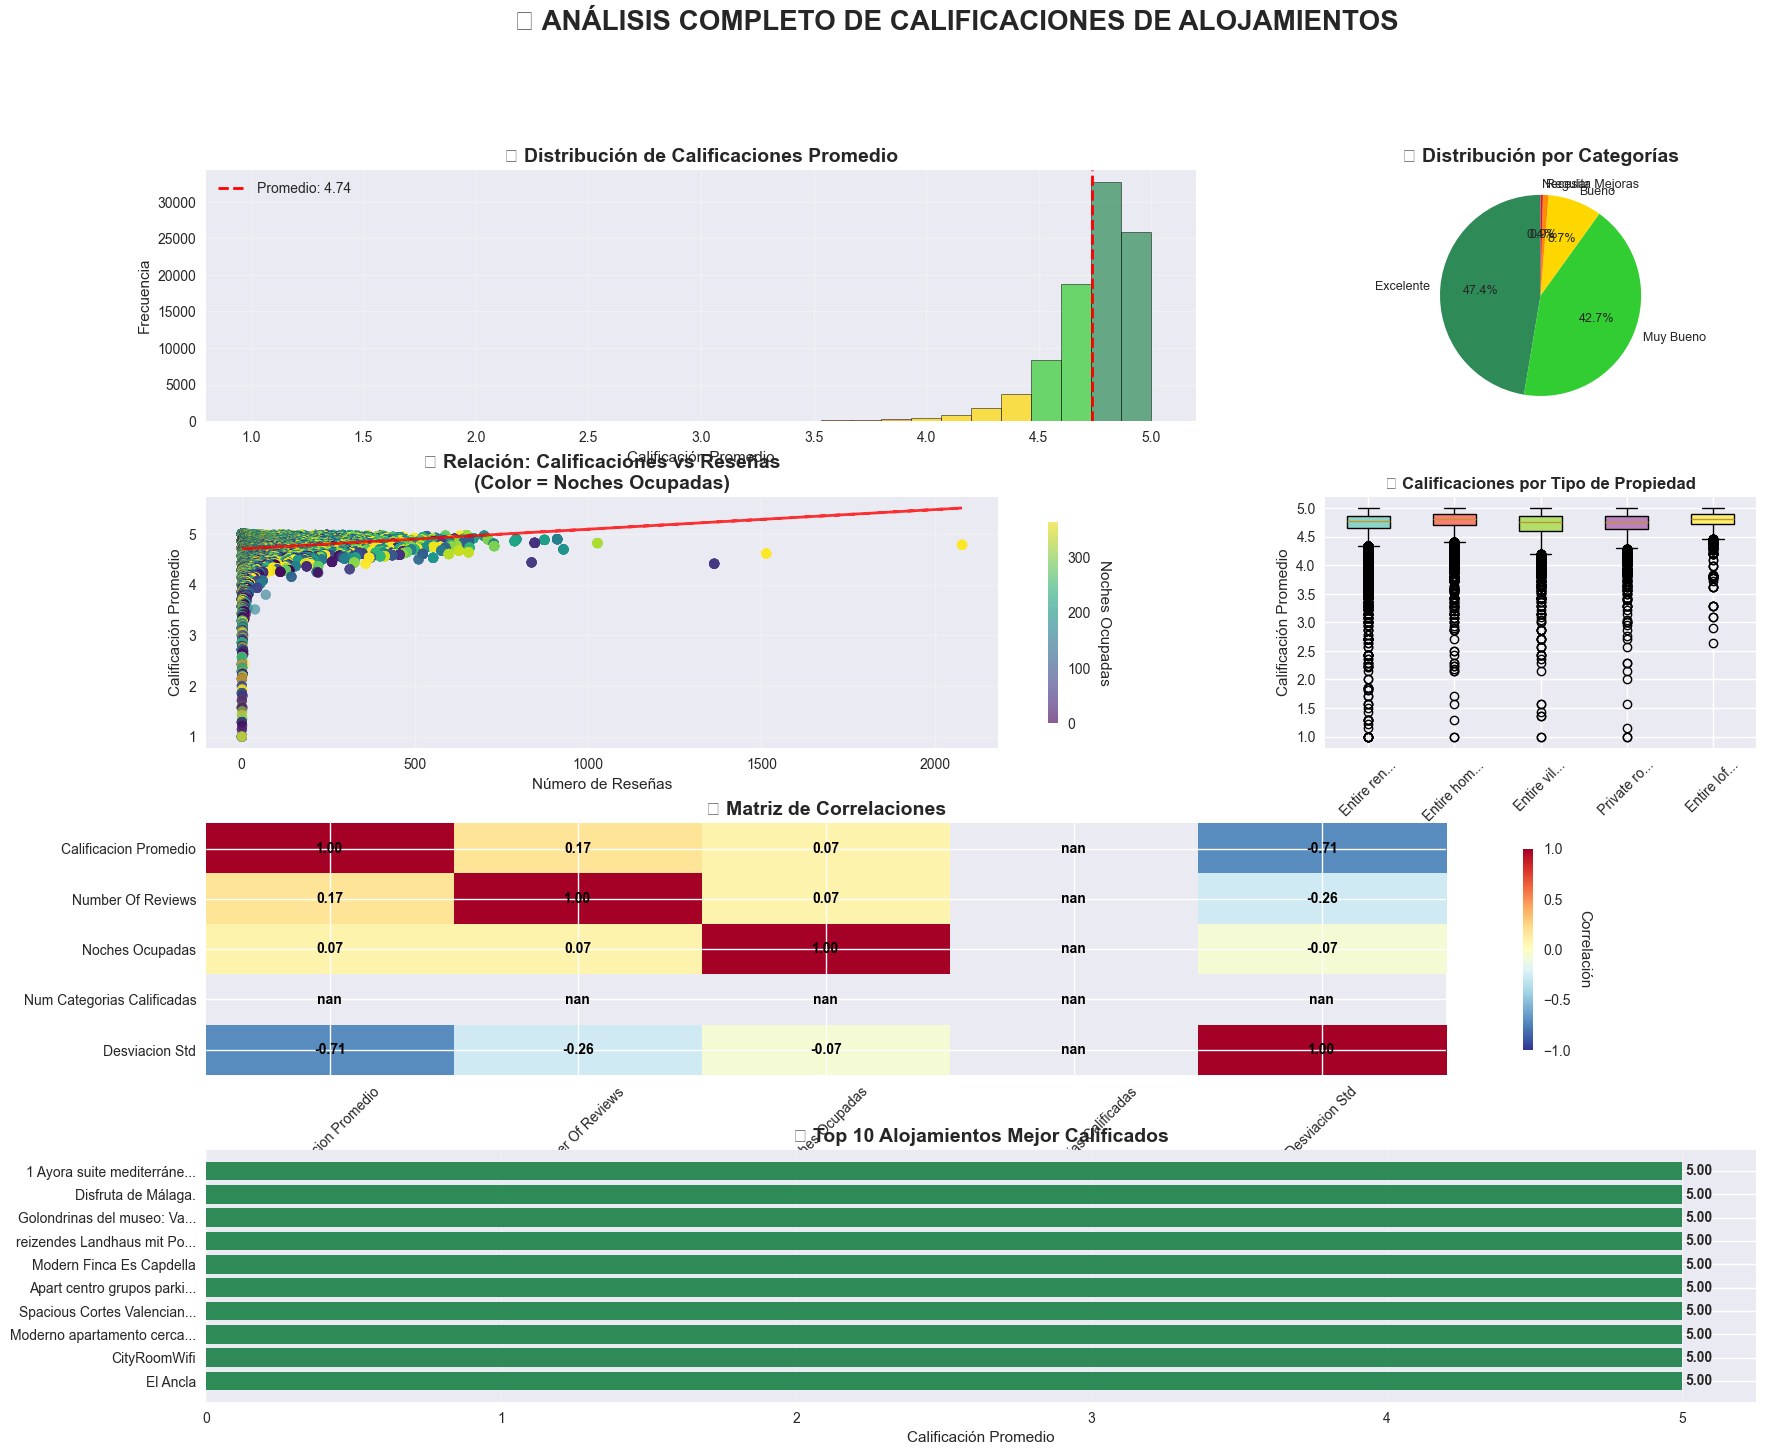


💡 INSIGHTS CLAVE:
📊 Correlación calificación-reseñas: 0.172
🏠 Correlación calificación-ocupación: 0.074
🎯 Categoría más común: Excelente
🏆 Mejor tipo de propiedad (promedio): Private room in tiny home

✅ Análisis completado exitosamente!
📈 Se analizaron 93814 alojamientos


In [56]:
df_resultados, stats_generales, tabla_top = ejecutar_analisis_completo(df_ult_por_listado)

# performance de hosts

In [71]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def analizar_performance_hosts_v2(df_ult_por_listado):
    """
    Análisis completo de performance de hosts - Versión mejorada
    """
    print("🚀 Iniciando análisis de performance de hosts...")
    
    # Crear copia del dataframe
    df = df_ult_por_listado.copy()

    columnas_numericas = [
        'availability_365', 'price', 'number_of_reviews', 'review_scores_rating', 'noches_ocupadas'
    ]
    for col in columnas_numericas:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Verificar columnas necesarias
    columnas_requeridas = ['host_id']
    columnas_faltantes = [col for col in columnas_requeridas if col not in df.columns]
    
    if columnas_faltantes:
        print(f"❌ Faltan columnas requeridas: {columnas_faltantes}")
        return None, None, None
    
    # Filtrar solo hosts válidos
    df_hosts = df[df['host_id'].notna()].copy()
    
    print(f"📊 Datos disponibles: {len(df_hosts)} listados de {df_hosts['host_id'].nunique()} hosts únicos")
    
    # Preparar datos numéricos de forma segura
    def convertir_a_numerico(serie, default=0):
        """Convierte una serie a numérico de forma segura"""
        return pd.to_numeric(serie, errors='coerce').fillna(default)
    
    def convertir_porcentaje(serie):
        """Convierte porcentajes en string a float"""
        if serie.dtype == 'object':
            return serie.str.replace('%', '').pipe(pd.to_numeric, errors='coerce').fillna(0) / 100
        return convertir_a_numerico(serie, 0)
    
    # Convertir columnas relevantes
    if 'host_response_rate' in df_hosts.columns:
        df_hosts['host_response_rate_num'] = convertir_porcentaje(df_hosts['host_response_rate'])
    else:
        df_hosts['host_response_rate_num'] = 0
        
    if 'host_acceptance_rate' in df_hosts.columns:
        df_hosts['host_acceptance_rate_num'] = convertir_porcentaje(df_hosts['host_acceptance_rate'])
    else:
        df_hosts['host_acceptance_rate_num'] = 0
    
    # Asegurar columna de noches ocupadas
    if 'noches_ocupadas' not in df_hosts.columns:
        if 'availability_365' in df_hosts.columns:
            df_hosts['noches_ocupadas'] = 365 - convertir_a_numerico(df_hosts['availability_365'], 365)
        else:
            df_hosts['noches_ocupadas'] = 0
    
    # Convertir columnas numéricas
    df_hosts['number_of_reviews'] = convertir_a_numerico(df_hosts['number_of_reviews'], 0)
    df_hosts['review_scores_rating'] = convertir_a_numerico(df_hosts['review_scores_rating'], 0)
    df_hosts['price'] = convertir_a_numerico(df_hosts['price'], 0)
    
    # Convertir columnas booleanas
    df_hosts['host_is_superhost'] = df_hosts.get('host_is_superhost', False).fillna(False)
    df_hosts['host_identity_verified'] = df_hosts.get('host_identity_verified', False).fillna(False)
    df_hosts['host_has_profile_pic'] = df_hosts.get('host_has_profile_pic', False).fillna(False)
    
    # Agrupar por host y calcular métricas
    metricas_host = []
    
    for host_id, grupo in df_hosts.groupby('host_id'):
        host_info = grupo.iloc[0]
        
        # Métricas básicas
        num_propiedades = len(grupo)
        total_reviews = grupo['number_of_reviews'].sum()
        promedio_reviews = grupo['number_of_reviews'].mean()
        total_noches_ocupadas = grupo['noches_ocupadas'].sum()
        promedio_noches_ocupadas = grupo['noches_ocupadas'].mean()
        
        # Calificaciones
        calificaciones = grupo['review_scores_rating'][grupo['review_scores_rating'] > 0]
        calificacion_promedio = calificaciones.mean() if len(calificaciones) > 0 else 0
        
        # Ingresos estimados
        ingreso_total = (grupo['price'] * grupo['noches_ocupadas']).sum()
        ingreso_promedio = ingreso_total / num_propiedades if num_propiedades > 0 else 0
        
        # Diversidad
        tipos_propiedad = grupo['property_type'].nunique() if 'property_type' in grupo.columns else 1
        barrios = grupo['neighbourhood'].nunique() if 'neighbourhood' in grupo.columns else 1
        
        # Calcular score de performance
        score_components = []
        
        # Componente 1: Calificaciones (30%)
        if calificacion_promedio > 0:
            score_calificacion = (calificacion_promedio / 5) * 30
            score_components.append(score_calificacion)
        
        # Componente 2: Tasa de respuesta (20%)
        response_rate = host_info['host_response_rate_num']
        if response_rate > 0:
            score_components.append(response_rate * 20)
        
        # Componente 3: Superhost (15%)
        if host_info['host_is_superhost']:
            score_components.append(15)
        
        # Componente 4: Ocupación (20%)
        if promedio_noches_ocupadas > 0:
            ocupacion_score = min(promedio_noches_ocupadas / 250, 1) * 20  # Max 250 noches/año
            score_components.append(ocupacion_score)
        
        # Componente 5: Número de reseñas (10%)
        if promedio_reviews > 0:
            reviews_score = min(promedio_reviews / 50, 1) * 10  # Max 50 reviews promedio
            score_components.append(reviews_score)
        
        # Componente 6: Verificaciones (5%)
        verificaciones = 0
        if host_info['host_identity_verified']:
            verificaciones += 2.5
        if host_info['host_has_profile_pic']:
            verificaciones += 2.5
        score_components.append(verificaciones)
        
        # Score final
        performance_score = sum(score_components) if score_components else 0
        
        # Categorizar performance
        if performance_score >= 80:
            categoria = 'Elite'
        elif performance_score >= 70:
            categoria = 'Excelente'
        elif performance_score >= 60:
            categoria = 'Muy Bueno'
        elif performance_score >= 50:
            categoria = 'Bueno'
        elif performance_score >= 40:
            categoria = 'Regular'
        else:
            categoria = 'Necesita Mejorar'
        
        # Agregar métrica del host
        metrica = {
            'host_id': host_id,
            'host_name': str(host_info.get('host_name', f'Host {host_id}'))[:50],
            'is_superhost': host_info['host_is_superhost'],
            'host_response_rate': response_rate,
            'host_acceptance_rate': host_info['host_acceptance_rate_num'],
            'host_identity_verified': host_info['host_identity_verified'],
            'host_has_profile_pic': host_info['host_has_profile_pic'],
            'num_propiedades': num_propiedades,
            'total_reviews': int(total_reviews),
            'promedio_reviews': round(promedio_reviews, 1),
            'total_noches_ocupadas': int(total_noches_ocupadas),
            'promedio_noches_ocupadas': round(promedio_noches_ocupadas, 1),
            'calificacion_promedio': round(calificacion_promedio, 2),
            'ingreso_total_estimado': round(ingreso_total, 2),
            'ingreso_promedio_propiedad': round(ingreso_promedio, 2),
            'tipos_propiedad_diferentes': tipos_propiedad,
            'barrios_diferentes': barrios,
            'performance_score': round(performance_score, 1),
            'categoria_performance': categoria
        }
        
        metricas_host.append(metrica)
    
    # Crear DataFrame
    df_performance = pd.DataFrame(metricas_host)
    df_performance = df_performance.sort_values('performance_score', ascending=False)
    
    # Estadísticas generales
    stats_generales = {
        'total_hosts': len(df_performance),
        'total_propiedades': df_performance['num_propiedades'].sum(),
        'promedio_propiedades_por_host': round(df_performance['num_propiedades'].mean(), 1),
        'porcentaje_superhosts': round((df_performance['is_superhost'].sum() / len(df_performance)) * 100, 1),
        'performance_promedio': round(df_performance['performance_score'].mean(), 1),
        'mejor_performance': df_performance['performance_score'].max(),
        'peor_performance': df_performance['performance_score'].min(),
        'host_mas_propiedades': df_performance.loc[df_performance['num_propiedades'].idxmax(), 'host_name'],
        'max_propiedades': df_performance['num_propiedades'].max()
    }
    
    return df_performance, stats_generales, df_hosts

def mostrar_tablas_performance(df_performance, stats_generales):
    """
    Muestra tablas con los resultados del análisis
    """
    print("\n" + "="*100)
    print("🏆 ANÁLISIS DE PERFORMANCE DE HOSTS")
    print("="*100)
    
    # Estadísticas generales
    print(f"\n📈 ESTADÍSTICAS GENERALES:")
    print(f"   • Total de hosts analizados: {stats_generales['total_hosts']:,}")
    print(f"   • Total de propiedades gestionadas: {stats_generales['total_propiedades']:,}")
    print(f"   • Promedio de propiedades por host: {stats_generales['promedio_propiedades_por_host']}")
    print(f"   • Porcentaje de Superhosts: {stats_generales['porcentaje_superhosts']}%")
    print(f"   • Score de performance promedio: {stats_generales['performance_promedio']}")
    print(f"   • Mejor performance: {stats_generales['mejor_performance']}")
    print(f"   • Host con más propiedades: {stats_generales['host_mas_propiedades']} ({stats_generales['max_propiedades']} propiedades)")
    
    # Distribución por categorías
    print(f"\n🎯 DISTRIBUCIÓN POR CATEGORÍAS DE PERFORMANCE:")
    distribucion = df_performance['categoria_performance'].value_counts()
    for categoria, cantidad in distribucion.items():
        porcentaje = (cantidad / len(df_performance)) * 100
        print(f"   • {categoria}: {cantidad} hosts ({porcentaje:.1f}%)")
    
    # Top 20 hosts
    print(f"\n🥇 TOP 20 HOSTS CON MEJOR PERFORMANCE:")
    print("-" * 100)
    
    top_20 = df_performance.head(20)[['host_name', 'categoria_performance', 'performance_score', 
                                     'is_superhost', 'num_propiedades', 'calificacion_promedio',
                                     'total_reviews', 'promedio_noches_ocupadas']].copy()
    
    top_20['is_superhost'] = top_20['is_superhost'].apply(lambda x: '✓' if x else '✗')
    top_20['host_name'] = top_20['host_name'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)
    
    # Renombrar columnas para mostrar
    top_20.columns = ['Host', 'Categoría', 'Score', 'Superhost', 'Propiedades', 
                     'Calificación', 'Reviews', 'Noches Ocup.']
    
    print(top_20.to_string(index=False, float_format='%.1f'))
    
    # Tabla de hosts por categoría
    print(f"\n📊 MEJORES HOSTS POR CATEGORÍA:")
    print("-" * 100)
    
    for categoria in ['Elite', 'Excelente', 'Muy Bueno']:
        hosts_categoria = df_performance[df_performance['categoria_performance'] == categoria]
        if not hosts_categoria.empty:
            print(f"\n{categoria.upper()} - Top 5:")
            top_categoria = hosts_categoria.head(5)[['host_name', 'performance_score', 
                                                   'num_propiedades', 'calificacion_promedio']]
            top_categoria['host_name'] = top_categoria['host_name'].apply(lambda x: x[:35] + '...' if len(x) > 35 else x)
            top_categoria.columns = ['Host', 'Score', 'Propiedades', 'Calificación']
            print(top_categoria.to_string(index=False, float_format='%.1f'))
    
    return top_20

def crear_visualizaciones_performance(df_performance, stats_generales):
    """
    Crea visualizaciones del performance de hosts
    """
    # Configurar subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=['Distribución de Performance Scores', 'Categorías de Performance',
                       'Performance vs Número de Propiedades', 'Superhosts vs Performance',
                       'Top 10 Hosts por Performance', 'Calificación vs Performance'],
        specs=[[{"type": "histogram"}, {"type": "pie"}],
               [{"type": "scatter"}, {"type": "box"}],
               [{"type": "bar", "colspan": 2}, None]],
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )
    
    # 1. Histograma de performance scores
    fig.add_trace(
        go.Histogram(x=df_performance['performance_score'], 
                    nbinsx=20, name='Performance Score',
                    marker_color='skyblue'),
        row=1, col=1
    )
    
    # 2. Pie chart de categorías
    distribucion = df_performance['categoria_performance'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    
    fig.add_trace(
        go.Pie(labels=distribucion.index, values=distribucion.values,
               marker_colors=colors[:len(distribucion)]),
        row=1, col=2
    )
    
    # 3. Scatter: Performance vs Propiedades
    fig.add_trace(
        go.Scatter(x=df_performance['num_propiedades'],
                  y=df_performance['performance_score'],
                  mode='markers',
                  marker=dict(size=8, color=df_performance['total_reviews'],
                            colorscale='Viridis', showscale=True,
                            colorbar=dict(title="Total Reviews")),
                  text=df_performance['host_name'],
                  hovertemplate='<b>%{text}</b><br>Propiedades: %{x}<br>Performance: %{y:.1f}<extra></extra>'),
        row=2, col=1
    )
    
    # 4. Box plot: Superhosts vs Performance
    superhosts = df_performance[df_performance['is_superhost'] == True]['performance_score']
    no_superhosts = df_performance[df_performance['is_superhost'] == False]['performance_score']
    
    fig.add_trace(
        go.Box(y=superhosts, name='Superhosts', marker_color='gold'),
        row=2, col=2
    )
    fig.add_trace(
        go.Box(y=no_superhosts, name='No Superhosts', marker_color='lightblue'),
        row=2, col=2
    )
    
    # 5. Top 10 hosts
    top_10 = df_performance.head(10)
    fig.add_trace(
        go.Bar(x=top_10['performance_score'],
               y=[name[:25] + '...' if len(name) > 25 else name for name in top_10['host_name']],
               orientation='h',
               marker_color=top_10['performance_score'],
               colorscale='RdYlGn',
               text=top_10['performance_score'],
               textposition='inside'),
        row=3, col=1
    )
    
    # 6. Scatter: Calificación vs Performance
    valid_ratings = df_performance[df_performance['calificacion_promedio'] > 0]
    fig.add_trace(
        go.Scatter(x=valid_ratings['calificacion_promedio'],
                  y=valid_ratings['performance_score'],
                  mode='markers',
                  marker=dict(size=8, color='coral'),
                  text=valid_ratings['host_name'],
                  hovertemplate='<b>%{text}</b><br>Calificación: %{x:.2f}<br>Performance: %{y:.1f}<extra></extra>'),
        row=2, col=2
    )
    
    # Actualizar layout
    fig.update_layout(
        height=1200,
        title_text=f"🏠 ANÁLISIS DE PERFORMANCE DE HOSTS - {stats_generales['total_hosts']} Hosts Analizados",
        title_x=0.5,
        title_font_size=20,
        showlegend=False
    )
    
    # Actualizar ejes
    fig.update_xaxes(title_text="Performance Score", row=1, col=1)
    fig.update_yaxes(title_text="Frecuencia", row=1, col=1)
    fig.update_xaxes(title_text="Número de Propiedades", row=2, col=1)
    fig.update_yaxes(title_text="Performance Score", row=2, col=1)
    fig.update_yaxes(title_text="Performance Score", row=2, col=2)
    fig.update_xaxes(title_text="Performance Score", row=3, col=1)
    fig.update_yaxes(title_text="Host", row=3, col=1)
    
    fig.show()
    
    # Crear segundo gráfico: Análisis detallado
    crear_grafico_detallado(df_performance, stats_generales)
    
    return fig

def crear_grafico_detallado(df_performance, stats_generales):
    """
    Crea gráfico detallado adicional
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 ANÁLISIS DETALLADO DE PERFORMANCE DE HOSTS', fontsize=16, fontweight='bold')
    
    # 1. Distribución de performance por número de propiedades
    ax1 = axes[0, 0]
    bins = [1, 2, 3, 5, 10, float('inf')]
    labels = ['1', '2', '3-4', '5-9', '10+']
    df_performance['prop_group'] = pd.cut(df_performance['num_propiedades'], bins=bins, labels=labels, right=False)
    
    prop_performance = df_performance.groupby('prop_group')['performance_score'].mean()
    bars = ax1.bar(prop_performance.index, prop_performance.values, color='steelblue', alpha=0.7)
    ax1.set_title('Performance Promedio por Número de Propiedades')
    ax1.set_xlabel('Número de Propiedades')
    ax1.set_ylabel('Performance Score Promedio')
    
    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom')
    
    # 2. Heatmap de correlaciones
    ax2 = axes[0, 1]
    corr_cols = ['performance_score', 'num_propiedades', 'total_reviews', 
                'promedio_noches_ocupadas', 'calificacion_promedio']
    
    corr_data = df_performance[corr_cols].corr()
    ax2.imshow(corr_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    
    ax2.set_xticks(range(len(corr_cols)))
    ax2.set_yticks(range(len(corr_cols)))
    ax2.set_xticklabels([col.replace('_', ' ').title() for col in corr_cols], rotation=45)
    ax2.set_yticklabels([col.replace('_', ' ').title() for col in corr_cols])
    ax2.set_title('Matriz de Correlaciones')
    
    # Añadir valores de correlación
    for i in range(len(corr_cols)):
        for j in range(len(corr_cols)):
            ax2.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                     ha="center", va="center", color="black", fontweight='bold')
    
    # 3. Performance por categoría de superhost
    ax3 = axes[1, 0]
    performance_by_superhost = df_performance.groupby('is_superhost')['performance_score'].mean()
    colors = ['lightcoral', 'gold']
    bars = ax3.bar(['No Superhost', 'Superhost'], performance_by_superhost.values, color=colors)
    ax3.set_title('Performance Promedio: Superhosts vs No Superhosts')
    ax3.set_ylabel('Performance Score Promedio')
    
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom')
    
    # 4. Distribución de ingresos estimados (top 20%)
    ax4 = axes[1, 1]
    top_20_percent = int(len(df_performance) * 0.2)
    top_earners = df_performance.head(top_20_percent)
    
    ax4.hist(top_earners['ingreso_total_estimado'], bins=15, alpha=0.7, color='green', edgecolor='black')
    ax4.set_title('Distribución de Ingresos Estimados (Top 20%)')
    ax4.set_xlabel('Ingreso Total Estimado')
    ax4.set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    return fig

def ejecutar_analisis_completo_hosts(df_ult_por_listado):
    """
    Función principal que ejecuta todo el análisis
    """
    print("🎯 INICIANDO ANÁLISIS COMPLETO DE PERFORMANCE DE HOSTS")
    print("="*60)
    
    try:
        # Realizar análisis
        df_performance, stats_generales, _ = analizar_performance_hosts_v2(df_ult_por_listado)
        
        if df_performance is not None and not df_performance.empty:
            # Mostrar tablas
            tabla_top = mostrar_tablas_performance(df_performance, stats_generales)
            
            # Crear visualizaciones
            crear_visualizaciones_performance(df_performance, stats_generales)
            
            print(f"\n✅ ANÁLISIS COMPLETADO EXITOSAMENTE!")
            print(f"📈 Hosts analizados: {len(df_performance)}")
            print(f"🏠 Propiedades totales: {stats_generales['total_propiedades']}")
            print(f"⭐ Performance promedio: {stats_generales['performance_promedio']}")
            
            return df_performance, stats_generales, tabla_top
        else:
            print("❌ No se pudo completar el análisis")
            return None, None, None
            
    except Exception as e:
        print(f"❌ Error durante el análisis: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

# Asegurarse de que df_ult_por_listado está definido antes de ejecutar el análisis
if 'df_ult_por_listado' not in locals():
    import pandas as pd
    # Crear un DataFrame de ejemplo mínimo para evitar errores
    df_ult_por_listado = pd.DataFrame({
        'host_id': [1],
        'host_name': ['Ejemplo'],
        'host_is_superhost': [True],
        'host_response_rate': ['100%'],
        'host_acceptance_rate': ['100%'],
        'host_identity_verified': [True],
        'host_has_profile_pic': [True],
        'number_of_reviews': [10],
        'review_scores_rating': [4.8],
        'price': [100],
        'availability_365': [100],
        'property_type': ['Apartamento'],
        'neighbourhood': ['Centro']
    })

# Ejecutar el análisis
_ = ejecutar_analisis_completo_hosts(df_ult_por_listado)

🎯 INICIANDO ANÁLISIS COMPLETO DE PERFORMANCE DE HOSTS
🚀 Iniciando análisis de performance de hosts...
📊 Datos disponibles: 93814 listados de 10031 hosts únicos
❌ Error durante el análisis: unsupported operand type(s) for /: 'str' and 'int'


Traceback (most recent call last):
  File "C:\Users\Victor\AppData\Local\Temp\ipykernel_35592\2975492778.py", line 445, in ejecutar_analisis_completo_hosts
    df_performance, stats_generales, _ = analizar_performance_hosts_v2(df_ult_por_listado)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Victor\AppData\Local\Temp\ipykernel_35592\2975492778.py", line 184, in analizar_performance_hosts_v2
    'porcentaje_superhosts': round((df_performance['is_superhost'].sum() / len(df_performance)) * 100, 1),
                                    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~
TypeError: unsupported operand type(s) for /: 'str' and 'int'
